In [36]:
using QuantumOptics
using Plots
using LinearAlgebra

# QuantumOptics momentum basis

In [263]:
kBZmin = -pi
kBZmax = pi
NkBZ = 10 # take this even to include k=0
basis_k = MomentumBasis(kBZmin, kBZmax, NkBZ)

Momentum(pmin=-3.141592653589793, pmax=3.141592653589793, N=10)

In [264]:
samplepoints(basis_k)/pi;

# One particle in a periodic potential

Length scale $d$, 

Energy scale $\hbar^2/(2md^2)$ 

In [265]:
NG = 2+1
kmin = kBZmin*NG
kmax = kBZmax*NG

basis_k = MomentumBasis(kmin, kmax, NG*NkBZ)
kpoints = samplepoints(basis_k)

x_op = position(basis_k);
p_op = momentum(basis_k);
kpoints/pi;

In [266]:
function ξkQ(k,Q=0)
    return (k+Q).^2
end

ξkQ (generic function with 2 methods)

In [267]:
Hkin = p_op^2;

In [268]:
diagm( ξkQ.(kpoints) ) == Hkin.data

true

In [269]:
# m = 1

# half of wavevector of the periodic lattice wave vector
qB = pi

# strength of the sin^2(qB*z) periodic potential
s = 1.
sER = s*qB^2

V1d = x -> sER*sin.(qB*x).^2

#37 (generic function with 1 method)

In [270]:
V1d_op = potentialoperator(basis_k, V1d);

In [271]:
#show(V1d_op)

In [272]:
H = Hkin + V1d_op;

In [273]:
E, states = eigenstates((H + dagger(H))/2);

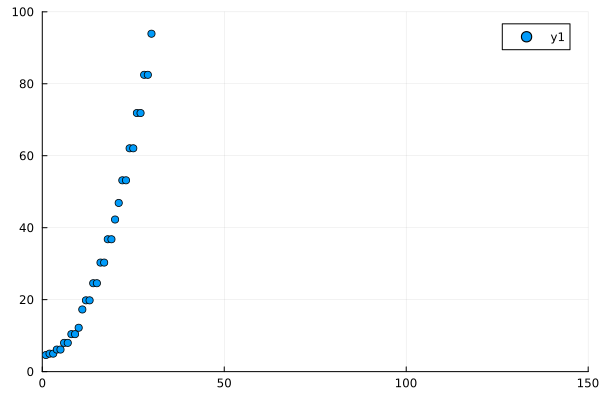

In [274]:
scatter(E, xlims=(0,150), ylims=(0,100))

In [275]:
E[1:NkBZ+5]

15-element Vector{Float64}:
  4.608688853647177
  4.990192222467602
  4.990192222467614
  6.127477894656827
  6.127477894656832
  7.9866592688896505
  7.986659268889673
 10.413605983369331
 10.413605983369344
 12.187739672873292
 17.27180770190638
 19.80961825313393
 19.809618253133944
 24.565967217046133
 24.56596721704615

In [276]:
E, states = eigenstates((H + dagger(H))/2, 10);
println(E)

[4.60868885364718, 4.990192222467602, 4.99019222246762, 6.127477894656831, 6.127477894656831, 7.986659268889651, 7.986659268889669, 10.413605983369335, 10.41360598336935, 12.18773967287329]


# Two particles 

In [277]:
Nparticles = 2
states = bosonstates(basis_k, Nparticles);

In [278]:
b2_k = ManyBodyBasis(basis_k, states)

ManyBody(onebodybasis=Momentum(pmin=-9.42477796076938, pmax=9.42477796076938, N=30), states:465)

In [279]:
#using LinearAlgebra

b_k2 = basis_k ⊗ basis_k

[Momentum(pmin=-9.42477796076938, pmax=9.42477796076938, N=30) ⊗ Momentum(pmin=-9.42477796076938, pmax=9.42477796076938, N=30)]

In [280]:
g = -0.01

-0.01

In [281]:
prod(b_k2.shape)

900

In [282]:
V2int = Operator(b_k2, g*ones(prod(b_k2.shape),prod(b_k2.shape)));

In [286]:
Hkin_mb = manybodyoperator(b2_k, Hkin)
Vext_mb = manybodyoperator(b2_k, V1d_op)
Vint_mb = manybodyoperator(b2_k, V2int);

In [287]:
H_mb = Hkin_mb + Vext_mb + Vint_mb;

In [288]:
eigenenergies((H_mb+dagger(H_mb))/2,3)

3-element Vector{Float64}:
 7.788421448253853
 9.266265432344529
 9.598881076114832

In [289]:
E2, U2 = eigenstates((H_mb+dagger(H_mb))/2);

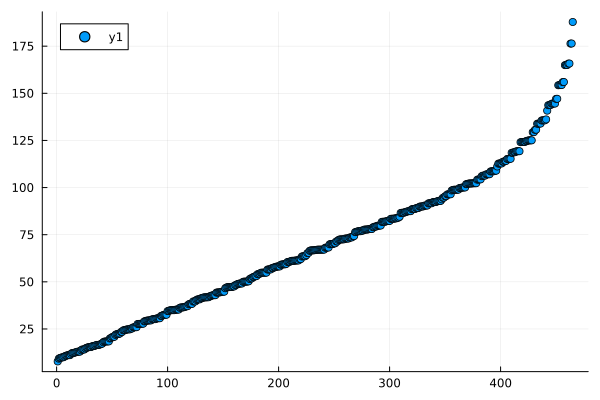

In [291]:
scatter(E2)